In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Для выполнения задания был взят набор данных, содержащий информацию об алмазах (цена, вес в каратах, уровень симметричности и т.д.).

Часть № 1

In [10]:
df = pd.read_csv('diamond.csv')
display(df.head(), df.shape)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


(6000, 8)

In [11]:
# Задание № 1
corr = df['Price'].corr(df['Carat Weight'])
print('Коэффициент корреляции равен:', corr)

Коэффициент корреляции равен: 0.8585621341250119


Полученное значчение корреляции, равное 0.8585621341250118, показывает, что между показателями "Price" и "Carat Weight" наблюдается сильная линейная зависимость (значение близкое к 1 говорит нам о положительной корреляции). 

Величина достоверности аппроксимации: 0.7371289381532953


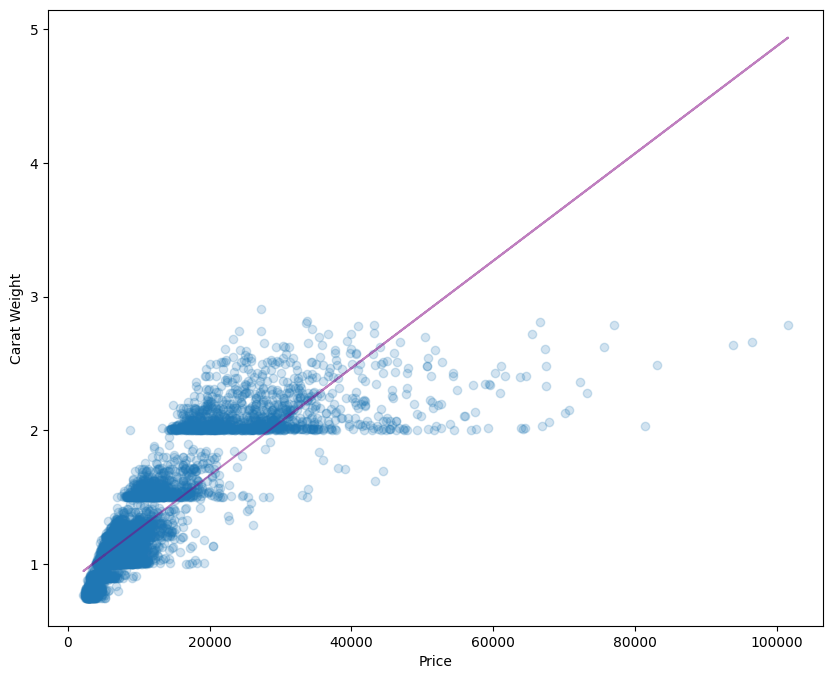

In [12]:
# Задание № 2
fig, ax= plt.subplots(figsize=(10, 8))
ax.scatter(x = df[['Price']], y = df['Carat Weight'], alpha=0.2)
plt.xlabel("Price")
plt.ylabel("Carat Weight")

# Построение линии аппроксимации
x, y = df[['Price']], df['Carat Weight']
model = LinearRegression()
model.fit(x, y)
prediction = model.predict(X=x)
plt.plot(x, prediction, color = 'purple', alpha=0.5)
model = LinearRegression()
r2 = r2_score(y, prediction)
print('Величина достоверности аппроксимации:', r2)

Часть № 2

In [13]:
# Для задания № 2 используем тот же набор данных, так как он соответствует условиям
# Создание случайной выборки
third = df.shape[0] / 3
df2 = df
df2_random = df2.sample(frac=1)
df2_random = df2_random[:int(third)]
df2_random = df2_random['Price']
display(df2_random.head(), df2_random.shape[0])

2414     5073
1827     2714
241     10755
5921     4715
212      4702
Name: Price, dtype: int64

2000

In [14]:
# Создание стратифицированной выборки
print(df2.value_counts(df2['Symmetry'])) # возьмем по 500 значений из каждой группы, разбитой по уровню симметричности алмазов
d1 = df2[df2['Symmetry'] == 'VG'].sample(frac = 1)[:500] 
d2 = df2[df2['Symmetry'] == 'EX'].sample(frac = 1)[:500]
d3 = df2[df2['Symmetry'] == 'G'].sample(frac = 1)[:500]
d4 = df2[df2['Symmetry'] == 'ID'].sample(frac = 1)[:500]
df2_sim = pd.concat([d1, d2, d3, d4], ignore_index=True)
df2_sim = df2_sim['Price']
display(df2_sim.head(), df2_sim.shape[0])

Symmetry
VG    2417
EX    2059
G      916
ID     608
Name: count, dtype: int64


0    6167
1    9236
2    6582
3    4390
4    8420
Name: Price, dtype: int64

2000

In [15]:
# Определение средних значений
df2_random_mean = df2_random.mean()
print('Средняя цена случайной выборки:', df2_random_mean)
df2_sim_mean = df2_sim.mean()
print('Средняя цена стратифицированной выборки:', df2_sim_mean)

Средняя цена случайной выборки: 11803.6755
Средняя цена стратифицированной выборки: 11933.3785


In [16]:
gen_mean = df2['Price'].mean() # Среднее генеральной выборки

def confidence_interval(data): # ф-ция определения интервала
    cf_lvl = [0.90, 0.95, 0.99]
    data_std = np.std(data, ddof=1)
    data_len = len(data)
    for i in cf_lvl:
        a = 1 - i
        t = stats.norm.ppf(1 - a / 2)
        error_rate = t * (data_std / np.sqrt(data_len)) # погрешность
        low = np.mean(data) - error_rate # определение нижнего интервала
        upp = np.mean(data) + error_rate # определение верхнего интервала
        print (f'Интервал {i*100}%: от', low, 'до', upp)
        if gen_mean < upp and gen_mean > low:
            print(f'Среднее генеральной выборки {gen_mean} попадает в границы доверительного интервала на уровне {i*100}%')
        else:
            print (f'Среднее генеральной выборки {gen_mean} НЕ попадает в границы доверительного интервала на уровне {i*100}%')
        
        print('-------------')

    print('-------------------------------------')
    
confidence_interval(data=df2_random) # Определение интервала для случайной выборки
confidence_interval(data=df2_sim) # Определение интервала для стратифицированной выборки

# Сравнение средних значений
if abs(gen_mean - df2_random_mean) > abs(gen_mean - df2_sim_mean):
    print(f'Среднее стратифицированной выборки {df2_sim_mean} ближе к среднему генеральной выборки {gen_mean}')
else:
    print(f'Среднее случайной выборки ближе {df2_random_mean} к среднему генеральной выборки {gen_mean}')

Интервал 90.0%: от 11433.78847423644 до 12173.562525763558
Среднее генеральной выборки 11791.579333333333 попадает в границы доверительного интервала на уровне 90.0%
-------------
Интервал 95.0%: от 11362.927924065934 до 12244.423075934064
Среднее генеральной выборки 11791.579333333333 попадает в границы доверительного интервала на уровне 95.0%
-------------
Интервал 99.0%: от 11224.434998381534 до 12382.916001618465
Среднее генеральной выборки 11791.579333333333 попадает в границы доверительного интервала на уровне 99.0%
-------------
-------------------------------------
Интервал 90.0%: от 11558.61297078853 до 12308.144029211471
Среднее генеральной выборки 11791.579333333333 попадает в границы доверительного интервала на уровне 90.0%
-------------
Интервал 95.0%: от 11486.817828663592 до 12379.93917133641
Среднее генеральной выборки 11791.579333333333 попадает в границы доверительного интервала на уровне 95.0%
-------------
Интервал 99.0%: от 11346.49829601976 до 12520.258703980242
С